#### Индивидуальное задание <br>
1. Найти и отрисовать контуры фигур на изображении <br>
2. Определить, какие фигуры изображены.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imgshow(image, conversion=cv2.COLOR_BGR2RGB):
    image = cv2.cvtColor(image, conversion)
    plt.imshow(image)
    plt.axis("off")
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
img_path = 'pictures/shapes.jpeg'

<b> Задание 1. </b> <br> <br>
Отобразим контуры методом Канни при помощи функции cv2.Canny(), предварительно переведя изображение в градации серого.


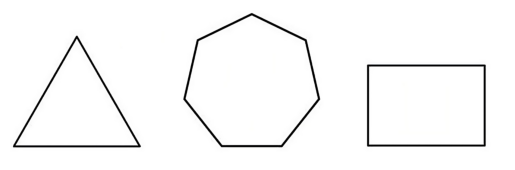

Количество контуров:  14


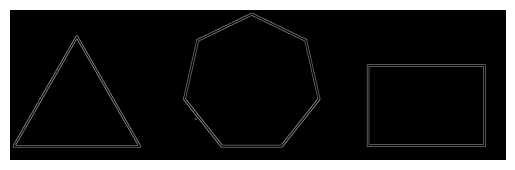

In [2]:
img = cv2.imread(img_path)
img_orig = img.copy()
imgshow(img_orig)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

len_cont = len(contours)
print("Количество контуров: ", len_cont)

imgshow(edges)

<b> Задание 2. </b> <br> <br>
Для того, чтобы определить, какие фигуры изображены, воспользуемся функцией cv2.approxPolyDP(). При помощи нее найдем приблизительные точки контура, которые и будем использовать в качестве определения вершин фигур. <br> <br>
Аргументы функции cv2.approxPolyDP():
    <li> cnt: контур, представленный в виде numpy массива точек </li>
    <li> epsilon: точность аппроксимации. Она определяет максимально допустимое расстояние между исходным контуром и его аппроксимацией. Чем меньше значение epsilon, тем более точной будет аппроксимация. </li>
    <li> closed: логическое значение, которое указывает, следует ли замкнуть полученный контур. </li>

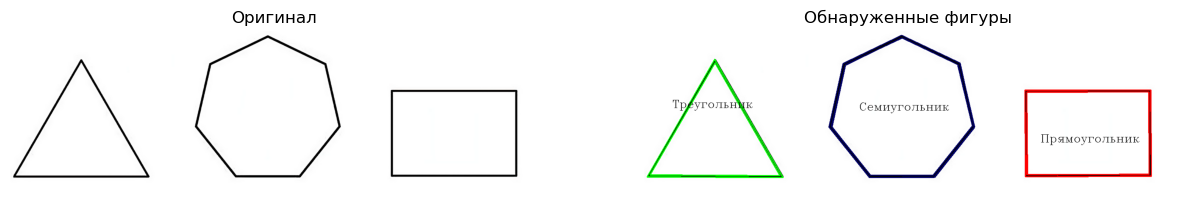

In [3]:
for cnt in contours:
    # Количество вершин
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    if len(approx) == 3:
        cv2.drawContours(img, [approx], 0, (0, 255, 0), 2)
        cv2.putText(img, "Треугольник", (76, 207), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    if len(approx) == 4:
        cv2.drawContours(img, [approx], 0, (255, 0, 0), 2)
        cv2.putText(img, "Прямоугольник", (1070, 300), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)
    if len(approx) == 7:
        cv2.drawContours(img, [approx], 0, (0, 0, 100), 2)
        cv2.putText(img, "Семиугольник", (580, 214), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 1)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_orig,cmap = 'gray'),plt.title('Оригинал')
plt.axis('off')
plt.subplot(122),plt.imshow(img,cmap = 'gray'),plt.title('Обнаруженные фигуры')
plt.axis('off')
plt.show()